In [1]:
# 2_collaborative_filtering.ipynb  
  
# Importation des bibliothèques  
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
import pickle  
from surprise import SVD, KNNBasic, Dataset, Reader  
from surprise.model_selection import cross_validate, train_test_split  
from surprise.accuracy import rmse, mae  
import warnings  
warnings.filterwarnings("ignore")  

In [2]:
#  Chargement des données préparées  
print("Chargement des données préparées...")  
try:  
    # Essayer de charger depuis le fichier pickle  
    with open('../data/processed/clean_dataset.pkl', 'rb') as f:  
        df = pickle.load(f)  
    print("Données chargées depuis le fichier pickle.")  
except:  
    # Sinon, charger depuis le CSV  
    df = pd.read_csv('../data/processed/clean_dataset.csv')  
    print("Données chargées depuis le fichier CSV.")  
  
print(f"Forme du dataset: {df.shape}")  
print("\nAperçu des données:")  
display(df.head())  

Chargement des données préparées...
Données chargées depuis le fichier pickle.
Forme du dataset: (5000, 14)

Aperçu des données:


,Uniq Id,Product Id,Product Name,Product Rating,Clicked,View_Time_Sec,Product Description,Product Tags,Product Category,Product Brand,Product Reviews Count,Full_Text,Norm_View_Time,Rating
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",4.218750,0,0,,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",Premium Beauty > Premium Makeup > Premium Nail...,OPI,571.035565,"opi infinite shine, nail lacquer nail polish,...",0.000000,2.109375
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,"Nice n Easy Permanent Color, 111 Natural Mediu...",3.966667,1,147,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi...",Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,571.035565,pack of 3 pack of 3 for the upc: 381519000201 ...,0.816667,4.300000
2,8d4d0330178d3ed181b15a4102b287f2,8a4fe5d9c7a6ed26cc44d785a454b124,Clairol Nice N Easy Permanent Color 7/106A Nat...,4.500000,0,0,This Clairol Nice N Easy Permanent Color gives...,Clairol Nice 'N Easy Permanent Color 7/106A Na...,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,29221.000000,this clairol nice n easy permanent color gives...,0.000000,2.250000
3,fddc4df45b35efd886794b261f730c51,03b5fb878a33eadff8b033419eab9669,"Kokie Professional Matte Lipstick, Hot Berry, ...",4.024138,0,0,Calling all matte lip lovers! Indulge in our r...,"Kokie Professional Matte Lipstick, Hot Berry, ...",Beauty > Makeup > Lip,Kokie Cosmetics,571.035565,calling all matte lip lovers! indulge in our r...,0.000000,2.012069
4,0990cf89a59ca6a0460349a3e4f51d42,ce3d761e57d6ccad80619297b5b1bcbc,"Gillette TRAC II Plus Razor Blade Refills, Fit...",5.000000,1,177,"In 1971, Gillette introduced the Trac II razor...","Gillette TRAC II Plus Razor Blade Refills, Fit...",Seasonal > Stock Up Essentials > Personal Care...,Gillette,131.000000,"in 1971, gillette introduced the trac ii razor...",0.983333,4.983333


In [3]:
 
# Préparation des données pour le filtrage collaboratif  
print("\n Préparation des données pour le filtrage collaboratif...")  
data = df[['Uniq Id', 'Product Id', 'Rating']]  
print(f"Nombre d'utilisateurs uniques: {data['Uniq Id'].nunique()}")  
print(f"Nombre de produits uniques: {data['Product Id'].nunique()}")  
print(f"Nombre total d'interactions: {len(data)}") 


 Préparation des données pour le filtrage collaboratif...
Nombre d'utilisateurs uniques: 5000
Nombre de produits uniques: 4802
Nombre total d'interactions: 5000


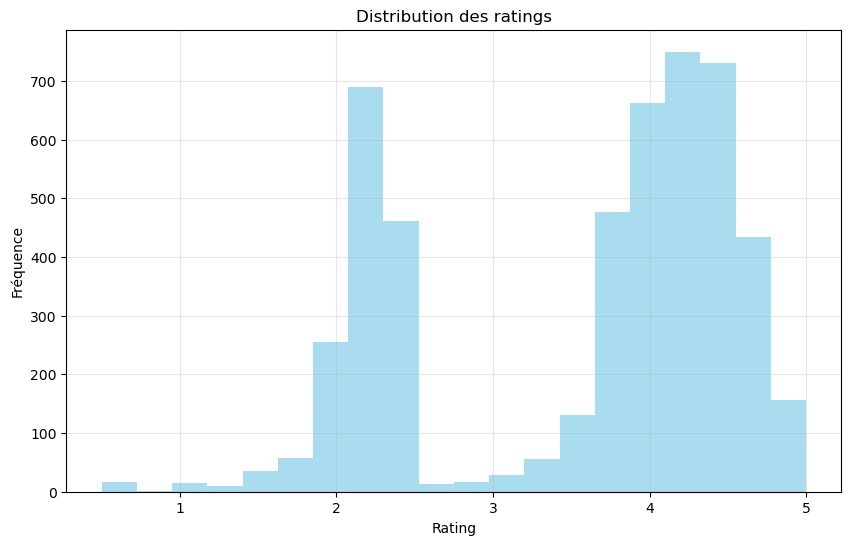

In [4]:
  
# Histogramme des ratings  
plt.figure(figsize=(10, 6))  
plt.hist(data['Rating'], bins=20, alpha=0.7, color='skyblue')  
plt.title('Distribution des ratings')  
plt.xlabel('Rating')  
plt.ylabel('Fréquence')  
plt.grid(alpha=0.3)  
plt.show() 

In [17]:
  
# Création du dataset Surprise  
reader = Reader(rating_scale=(1, 5))  
dataset = Dataset.load_from_df(data, reader)  
  
# Division en ensembles d'entraînement et de test  
trainset, testset = train_test_split(dataset, test_size=0.2, random_state=42)  

In [18]:
  
# Modèle 1: SVD (Singular Value Decomposition)  
print("\n Modèle 1: SVD (Singular Value Decomposition)")  
print("Entraînement du modèle SVD...")  
svd_model = SVD()  
++

svd_model.fit(trainset)  


 Modèle 1: SVD (Singular Value Decomposition)
Entraînement du modèle SVD...


In [19]:
  
# Évaluation sur l'ensemble de test  
svd_predictions = svd_model.test(testset)  
svd_rmse = rmse(svd_predictions)  
svd_mae = mae(svd_predictions)  
  
print(f"RMSE: {svd_rmse:.4f}")  
print(f"MAE: {svd_mae:.4f}")  

RMSE: 0.9935
MAE:  0.8799
RMSE: 0.9935
MAE: 0.8799


In [20]:
  
# Validation croisée pour une évaluation plus robuste  
print("\nValidation croisée pour SVD:")  
svd_cv_results = cross_validate(svd_model, dataset, measures=['RMSE', 'MAE'], cv=5, verbose=True)  
  
svd_mean_rmse = np.mean(svd_cv_results['test_rmse'])  
svd_mean_mae = np.mean(svd_cv_results['test_mae'])  
print(f"\nRMSE moyen (validation croisée): {svd_mean_rmse:.4f}")  
print(f"MAE moyen (validation croisée): {svd_mean_mae:.4f}") 


Validation croisée pour SVD:
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0148  0.9704  1.0102  1.0163  1.0039  1.0031  0.0169  
MAE (testset)     0.8906  0.8540  0.8953  0.8897  0.8918  0.8843  0.0153  
Fit time          0.12    0.15    0.14    0.14    0.14    0.14    0.01    
Test time         0.01    0.01    0.01    0.01    0.02    0.01    0.00    

RMSE moyen (validation croisée): 1.0031
MAE moyen (validation croisée): 0.8843


In [21]:
  
# Modèle 2: KNNBasic (User-Based)  
print("\n Modèle 2: KNNBasic (User-Based)")  
print("Entraînement du modèle KNNBasic...")  
sim_options = {  
    'name': 'cosine',  
    'user_based': True  
}  
knn_model = KNNBasic(sim_options=sim_options)  
knn_model.fit(trainset)  


 Modèle 2: KNNBasic (User-Based)
Entraînement du modèle KNNBasic...
Computing the cosine similarity matrix...
Done computing similarity matrix.


In [22]:
  
# Évaluation sur l'ensemble de test  
knn_predictions = knn_model.test(testset)  
knn_rmse = rmse(knn_predictions)  
knn_mae = mae(knn_predictions)  
  
print(f"RMSE: {knn_rmse:.4f}")  
print(f"MAE: {knn_mae:.4f}") 

RMSE: 0.9939
MAE:  0.8811
RMSE: 0.9939
MAE: 0.8811


In [23]:
  
# Validation croisée pour une évaluation plus robuste  
print("\nValidation croisée pour KNNBasic:")  
knn_cv_results = cross_validate(knn_model, dataset, measures=['RMSE', 'MAE'], cv=5, verbose=True)  
  
knn_mean_rmse = np.mean(knn_cv_results['test_rmse'])  
knn_mean_mae = np.mean(knn_cv_results['test_mae'])  
print(f"\nRMSE moyen (validation croisée): {knn_mean_rmse:.4f}")  
print(f"MAE moyen (validation croisée): {knn_mean_mae:.4f}")  


Validation croisée pour KNNBasic:
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9876  1.0181  1.0118  0.9860  1.0139  1.0035  0.0138  
MAE (testset)     0.8773  0.8954  0.8967  0.8688  0.8881  0.8853  0.0107  
Fit time          0.42    0.48    0.41    0.42    0.51    0.45    0.04    
Test time         0.02    0.02    0.02    0.02    0.02    0.02    0.00    

RMSE moyen (validation croisée): 1.0035
MAE moyen (validation croisée): 0.8853



📊 Comparaison des modèles de filtrage collaboratif:


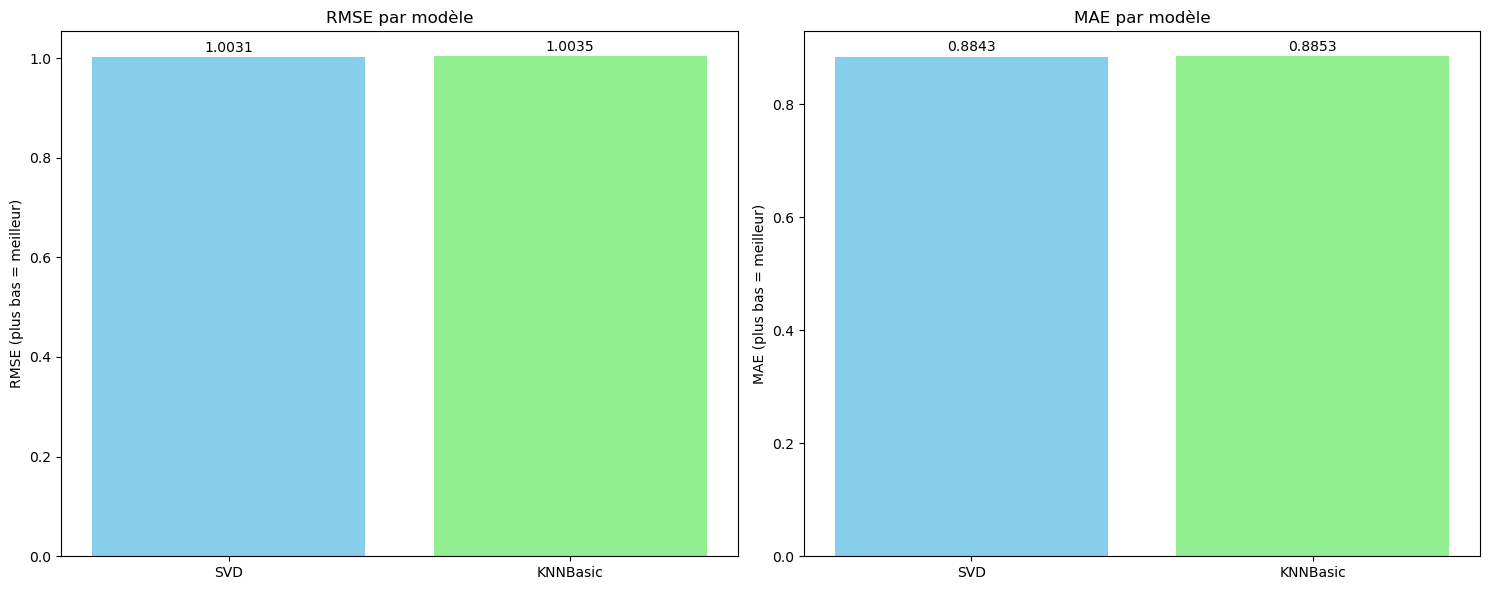

In [24]:
  
# 📊 Comparaison des modèles  
print("\n📊 Comparaison des modèles de filtrage collaboratif:")  
models = ['SVD', 'KNNBasic']  
rmse_values = [svd_mean_rmse, knn_mean_rmse]  
mae_values = [svd_mean_mae, knn_mean_mae]  
  
# Visualisation des résultats  
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))  
  
# RMSE  
ax1.bar(models, rmse_values, color=['skyblue', 'lightgreen'])  
ax1.set_title('RMSE par modèle')  
ax1.set_ylabel('RMSE (plus bas = meilleur)')  
for i, v in enumerate(rmse_values):  
    ax1.text(i, v + 0.01, f'{v:.4f}', ha='center')  
  
# MAE  
ax2.bar(models, mae_values, color=['skyblue', 'lightgreen'])  
ax2.set_title('MAE par modèle')  
ax2.set_ylabel('MAE (plus bas = meilleur)')  
for i, v in enumerate(mae_values):  
    ax2.text(i, v + 0.01, f'{v:.4f}', ha='center')  
  
plt.tight_layout()  
plt.show()  

In [25]:
  
#  Sauvegarde des modèles  
print("\n Sauvegarde des modèles...")  
import pickle  
  
with open('../models/collaborative/svd_model.pkl', 'wb') as f:  
    pickle.dump(svd_model, f)  
print("Modèle SVD sauvegardé dans '../models/svd_model.pkl'")  
  
with open('../models/collaborative/knn_model.pkl', 'wb') as f:  
    pickle.dump(knn_model, f)  
print("Modèle KNNBasic sauvegardé dans '../models/knn_model.pkl'")  
  
# Sauvegarde des résultats pour l'évaluation comparative  
results = {  
    'collaborative_filtering': {  
        'svd': {  
            'rmse': svd_mean_rmse,  
            'mae': svd_mean_mae  
        },  
        'knn': {  
            'rmse': knn_mean_rmse,  
            'mae': knn_mean_mae  
        }  
    }  
}  
  
with open('../results/collaborative_filtering_results.pkl', 'wb') as f:  
    pickle.dump(results, f)  
print("Résultats sauvegardés dans '../results/collaborative_filtering_results.pkl'")  


 Sauvegarde des modèles...
Modèle SVD sauvegardé dans '../models/svd_model.pkl'
Modèle KNNBasic sauvegardé dans '../models/knn_model.pkl'
Résultats sauvegardés dans '../results/collaborative_filtering_results.pkl'


In [26]:
  
# Exemple de prédiction  
print("\n Exemple de prédiction:")  
# Sélectionner un utilisateur et un produit aléatoires  
user_id = df['Uniq Id'].sample(1).iloc[0]  
product_id = df['Product Id'].sample(1).iloc[0]  
  
# Prédire la note avec SVD  
svd_prediction = svd_model.predict(user_id, product_id)  
print(f"Prédiction SVD pour l'utilisateur {user_id} et le produit {product_id}: {svd_prediction.est:.2f}")  
  
# Prédire la note avec KNNBasic  
knn_prediction = knn_model.predict(user_id, product_id)  
print(f"Prédiction KNNBasic pour l'utilisateur {user_id} et le produit {product_id}: {knn_prediction.est:.2f}")  
  
print("\n Filtrage collaboratif terminé!")


 Exemple de prédiction:
Prédiction SVD pour l'utilisateur ece7a3c285e22580183a75e8b5b17b97 et le produit 402c7fec743750279551c571e674c2c2: 3.91
Prédiction KNNBasic pour l'utilisateur ece7a3c285e22580183a75e8b5b17b97 et le produit 402c7fec743750279551c571e674c2c2: 3.55

 Filtrage collaboratif terminé!
